# MF4056 MF6013 Demo 5: Joint sampling of the short rate and the numeraire

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng=np.random.default_rng()

Set up model and simulation parameters. We will take 500 samples.

In [2]:
alpha=0.4; b=0.05; r0=0.03; T=1; sigma=0.02; Y0=0
M=500 

User-defined functions for the means, variances, covariance, and correlation

In [3]:
def mr(dt):
    return b*(1-np.exp(-alpha*dt))
              
def sigmar(dt):
    return np.sqrt((1-np.exp(-2*alpha*dt))*(sigma**2)/(2*alpha))
              
def mY(dt):
    return (1/alpha)*(r0-b)*(1-np.exp(-alpha*dt))+b*dt
              
def sigmaY(dt):
    return (sigma/alpha)*np.sqrt(dt+(0.5/alpha)*(1-np.exp(-2*alpha*dt))+(2/alpha)*(np.exp(-alpha*dt)-1))
              
def covrY(dt):
    return ((sigma**2)/(2*alpha))*(1+np.exp(-2*alpha*dt)-2*np.exp(-alpha*dt))
              
def rhorY(dt):
    return covrY(dt)/(sigmar(dt)*sigmaY(dt))

Generate independent bivariate Normal pairs and compute the Cholesky factor required to introduce the appropriate correlation structure

In [4]:
Z=rng.normal(0,1,(2,M))
s=T*np.array([[1,rhorY(T)],[rhorY(T),1]])
A=np.linalg.cholesky(s)


Apply the Cholesky factor and instantiate sample arrays

In [5]:
rY1=A.dot(Z)
rY2=A.dot(Z)

Rescale for the correct variances and shift for the correct means

In [6]:
rY2[0,:]=np.exp(-alpha*T)*r0+mr(T)+sigmar(T)*rY1[0,:]
rY2[1,:]=Y0+mY(T)+sigmaY(T)*rY1[1,:]

Now produce a scatterplot of $r(T)$ against $Y(T)$

In [7]:
x=rY2[0,:]
y=np.exp(-rY2[1,:])

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,marker=".")
    #ax = plt.gca().secondary_xaxis('top')
    ax.set_xlabel('$r(T)$',fontsize=20)
    ax.set_ylabel('$e^{-Y(T)}$',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    
    # now determine nice limits by hand:
    binwidthx = 0.002; binwidthy = 0.001
    xmax = np.max(np.abs(x))
    ymax = np.max(np.abs(y))
    limx = (int(xmax/binwidthx) + 1) * binwidthx
    limy = (int(ymax/binwidthy) + 1) * binwidthy

    binsx = np.arange(-0.03, limx + binwidthx, binwidthx)
    binsy = np.arange(0.86, limy + binwidthy, binwidthy)
    
    ax_histx.hist(x, bins=binsx, density=True)
    ax_histy.hist(y, bins=binsy, orientation='horizontal',density=True)

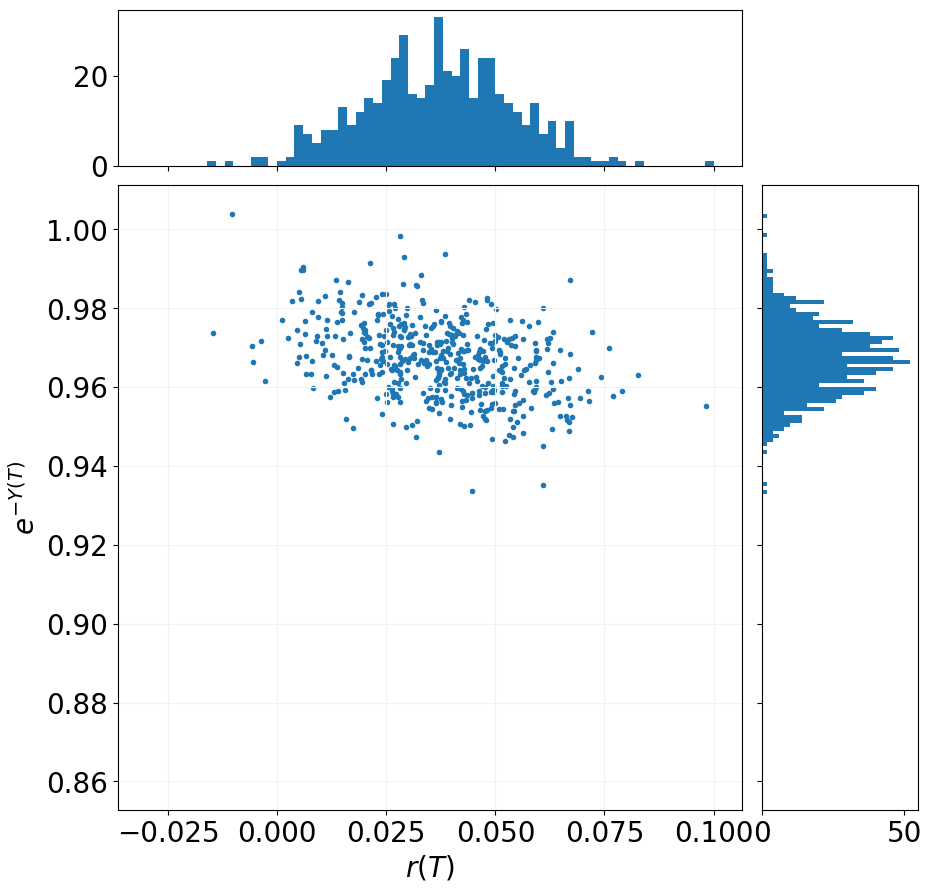

In [43]:
# Start with a square Figure.
fig = plt.figure(figsize=(10, 10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.grid(axis='both', color='0.95')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis='y', labelsize=20)
ax_histy.tick_params(axis='both', labelsize=20)


# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)
